In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
mu = np.asarray([1,1])
mu[0]

1

## ***3. Isocontours of Gaussian Distributions***

In [113]:
def compute_gauss_matrix(m,s,x,y):
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            data_pt = np.array([x[i][j], y[i][j]])
            numer = np.exp(-0.5 * (data_pt-m).T @ (np.linalg.inv(s) @ (data_pt-m))) # e^( - 1/2 * (x-mu)T * S^-1 * (x-mu))
            denom = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(s)) # sqrt((2pi)**2 * det(sigma))
            z_pt = numer / denom
            z[i][j] = z_pt
    return z

<a list of 30 text.Text objects>

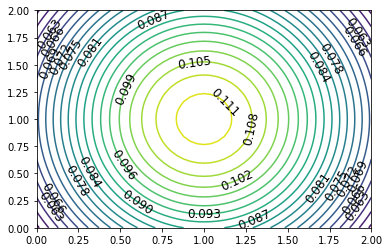

In [114]:
mu = np.asarray([1, 1])
sigma = np.array([[1, 0],[0, 2]])
X, Y = np.meshgrid(np.linspace(mu[0]-1, mu[0]+1, 51), np.linspace(mu[0]-1, mu[1]+1, 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
p = plt.contour(X, Y, Z, 20)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')


<a list of 22 text.Text objects>

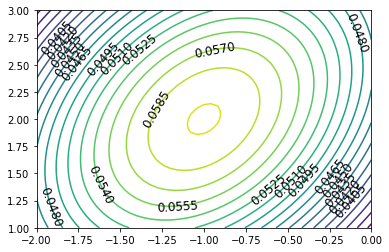

In [115]:
mu = np.asarray([-1, 2])
sigma = np.array([[2, 1],[1, 4]])
X, Y = np.meshgrid(np.linspace(mu[0]-sigma[0][1], mu[0]+sigma[0][1], 51), np.linspace(mu[1]-sigma[0][1], mu[1]+sigma[0][1], 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
p = plt.contour(X, Y, Z, 20)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 15 text.Text objects>

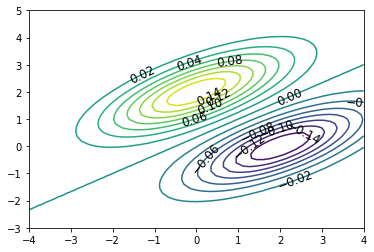

In [116]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma = np.array([[2, 1],[1, 1]])

X, Y = np.meshgrid(np.linspace(mu[0]-3*sigma[0][1], mu[0]+5*sigma[0][1], 51), np.linspace(mu[1]-5*sigma[0][1], mu[1]+3*sigma[0][1], 51))

Z_1 = compute_gauss_matrix(mu_1, sigma, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 20)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 10 text.Text objects>

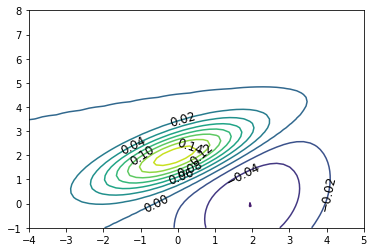

In [117]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma_1 = np.array([[2, 1],[1, 1]])
sigma_2 = np.array([[2,1],[1,4]])
X, Y = np.meshgrid(np.linspace(mu[0]-3*sigma[0][1], mu[0]+6*sigma[0][1], 51), np.linspace(mu[1]-3*sigma[0][1], mu[1]+6*sigma[0][1], 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 8 text.Text objects>

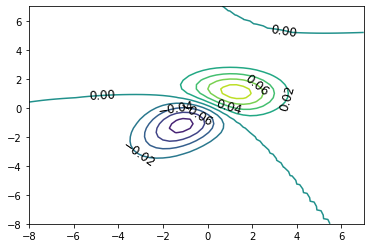

In [118]:
mu_1 = np.asarray([1,1])
mu_2 = np.asarray([-1,-1])
sigma_1 = np.array([[2, 0],[0, 1]])
sigma_2 = np.array([[2,1],[1,2]])

X, Y = np.meshgrid(np.linspace(mu_1[0] - mu_2[0] - 10, mu_1[0] - mu_2[0] + 5, 51), 
                    np.linspace(mu_1[1] - mu_2[1] - 10, mu_1[1] - mu_2[1] + 5, 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contour(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

## ***4. Eigenvectors of the Gaussian Covariance Matrix***


In [119]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

rs = RandomState(MT19937(SeedSequence(69420)))

X_1 = rs.normal(3, 3, 100)
X_2 = np.empty_like(X_1)
for i in range(X_1.shape[0]):
    X_2 = rs.normal(4, 2, 100) + 0.5 * X_1

X_1 = X_1.reshape((X_1.shape[0], 1))
X_2 = X_2.reshape((X_2.shape[0], 1))

X = np.hstack((X_1, X_2))

**1. Find the mean in ($R^2$) of the sample.**

In [120]:
X_mu = np.mean(X,axis=0)
X_mu

array([2.76916189, 5.24308424])

**2. Compute the 2x2 covariance matrix of the sample.**

In [121]:
X_covar = np.cov(X.T)
X_covar

array([[8.73890363, 4.03970734],
       [4.03970734, 6.18340679]])

**3. Compute the eigenvectors and eigenvalues of this covariance matrix.**

In [122]:
covar_eigvals, covar_eigvecs = np.linalg.eig(X_covar)
print(f"Here are the eigenvalues of the covariance matrix: {covar_eigvals}")
print("Here is the eigenbasis (normalized eigenvectors) of the covariance matrix:")
print(covar_eigvecs)


Here are the eigenvalues of the covariance matrix: [11.69812068  3.22418974]
Here is the eigenbasis (normalized eigenvectors) of the covariance matrix:
[[ 0.80671296 -0.59094349]
 [ 0.59094349  0.80671296]]


**4. On a two-dimensional grid with a horizontal axis for $X_1$ with range [-15, 15] and a vertical axis for $X_2$ with range [-15, 15], plot**

**i. all $n=100$ data points, and**

**ii. arrows representing both covariance eigenvectors. The eigenvector arrows should originate at the mean and have magnitudes equal to their corresponding eigenvalues.**

The magnitude of eigenvector 1, 11.69812067707414, is equal to its corresponding eigenvalue, 11.69812067707414
The magnitude of eigenvector 2, 3.224189736737576, is equal to its corresponding eigenvalue, 3.224189736737576


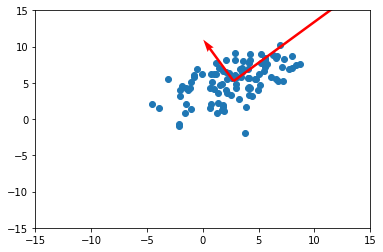

In [123]:
plt.scatter(X_1, X_2)
plt.axis([-15, 15, -15, 15])

origin = X_mu
eigvec_1 = covar_eigvecs[:,0] * covar_eigvals[0]
eigvec_2 = covar_eigvecs[:,1] * covar_eigvals[1]

plt.quiver(*origin, *eigvec_1, color=['r'], scale=21)
plt.quiver(*origin, *eigvec_2, color=['r'], scale=21)

norm_1 = np.linalg.norm(covar_eigvecs[:,1] * covar_eigvals[0])
norm_2 = np.linalg.norm(covar_eigvecs[:,1] * covar_eigvals[1])
# check
print(f"The magnitude of eigenvector 1, {norm_1}, is equal to its corresponding eigenvalue, {covar_eigvals[0]}")
print(f"The magnitude of eigenvector 2, {norm_2}, is equal to its corresponding eigenvalue, {covar_eigvals[1]}")

plt.show()

**5. Let $U = [v_1, v_2]$ be a 2 x 2 matrix whose columns are the $\textbf{unit}$ eigenvectors of the covariance matrix, where $v_1$ is the eigenvector with the larger eigenvalue. We use $U^{T}$ as a rotation matrix to rotate each sample point from the ($X_1, X_2$) coordinate system to a coordinate system aligned with the eigenvectors. Center your sample points by subtracting the mean $\mu$ from each point; then rotate each point by $U^T$, gaiving $x_{rotated} = U^{T}(x - \mu)$. Plot these rotated points on a new two-dimensional grid, again with both axes having range [-15, 15].**

(-15.0, 15.0, -15.0, 15.0)

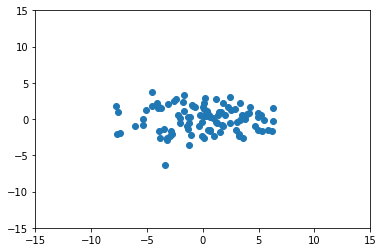

In [124]:
X_centered = np.empty_like(X)
for i in range(100):
    X_centered[i][:] = X[i][:] - X_mu
X_centered.shape

X_rotated = X_centered @ covar_eigvecs
plt.scatter(X_rotated[:,0], X_rotated[:,1])
plt.axis([-15, 15, -15, 15])

In [196]:
import numpy as np
import scipy as sp
from scipy import io
from scipy import stats
import pandas as pd

In [297]:
mnist = io.loadmat("data/%s_data.mat" % "mnist") # load the mnist data

# separate into training data, training labels, and testing data
mnist_raw_training_data = mnist["training_data"] 
mnist_training_labels = mnist["training_labels"]
mnist_test_data = mnist["test_data"]

mnist_tuples = np.append(mnist_raw_training_data, mnist_training_labels, axis=1)
mnist_tuples_shuffled = np.random.permutation(mnist_tuples)

# In order to partition our data, we will use pandas; we will convert our numpy array into a temporary 
# dataframe and set aside the first 10,000 shuffled tuples, which will then be separated back into
# training data and training labels, to the validation set. Then we will assign the remainder, again 
# separating the training data and training labels to the training set.

mnist_validation_data = mnist_tuples_shuffled[0:10000, 0:-1]
mnist_validation_labels = mnist_tuples_shuffled[0:10000, -1]
mnist_training_data = mnist_tuples_shuffled[10000:, 0:-1]
mnist_training_labels = mnist_tuples_shuffled[10000:, -1]

In [278]:
mnist_training_labels.shape

(50000,)

In [314]:
x = np.empty((1,)) 
np.append(x, 3)

array([3., 3.])

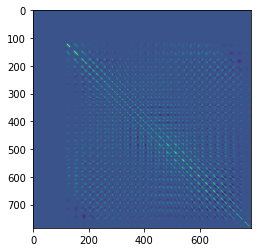

In [315]:
# We will combine the training data and their corresponding training labels
merged = pd.DataFrame(np.hstack((mnist_training_data, mnist_training_labels.reshape((mnist_training_labels.shape[0], 1)))))
digits = [0] * 10 # initialize arr, each index holds data corresponding to the corresponding digit
counts = np.unique(mnist_training_labels, return_counts=True)[1] # arr to hold counts of each label
digits_norms = np.empty((mnist_training_data.shape[1], 10))

for i in range(10): # iterate over digits
    raw_digit = merged[merged[merged.columns[-1]] == i].iloc[: , :-1].to_numpy().astype(float) # separate digit data from its label
    contrast_normalized_digit = np.empty_like(raw_digit) # initialize arr, contrast-normalized digit data
    for j in range(raw_digit.shape[1]): # iterate over image features
        feature_norm = np.linalg.norm(raw_digit[:,j]) # calculate feature norm
        digits_norms[j][i] = feature_norm
        if feature_norm != 0:
            contrast_normalized_digit[:,j] = raw_digit[:,j] / feature_norm
        else:
            contrast_normalized_digit[:,j] = raw_digit[:,j]
    digits[i] = contrast_normalized_digit
gaussians = [0] * 10
for i in range(10):
    mu = np.mean(digits[i], axis=0)
    sigma = np.cov(digits[i].T)
    gaussians[i] = [mu, sigma]

plt.imshow(gaussians[9][1])

In [308]:
digit_norm[0][1]

IndexError: invalid index to scalar variable.

In [289]:
mv = stats.multivariate_normal
pooled_sigma = sum(gaussians[i][1] for i in range(10)) / 10

def predict(data):
    discriminant_vals = [0] * 10
    for i in range(10):
        discriminant_vals[i] = np.log(counts[1][i] / sum(counts[1])) + mv.logpdf(x=data, mean=gaussians[i][0], cov=pooled_sigma, allow_singular=True)
    # print(np.argmin(discriminant_vals))
    return np.argmin(discriminant_vals)

trials = 20
count = 0
predictions = [0] * trials
for i in range(trials):
    predictions[i] = predict(mnist_training_data[i, :])
    if (predictions[i] == mnist_training_labels[i]):
        count += 1

IndexError: invalid index to scalar variable.

In [200]:
[]

array([3], dtype=int32)

In [187]:
pooled_sigma = sum(gaussians[i][1] for i in range(10)) / 10

In [188]:
def lda(d, m, s):
    def mu_t_pseudo_inverse_sigma(mu,sigma):
        return mu.T @ np.linalg.pinv(sigma.T)
    term = mu_t_pseudo_inverse_sigma(m,s)
    return (term @ d) - (0.5 * term @ m) + np.log(np.pi)

In [ ]:
qd = [lda()]